In [1]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')

In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
# Check for missing values in each column
print(df.isnull().sum())

# Example: Fill missing values with "Unknown" for columns where it makes sense
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


/tmp/ipykernel_359428/4040107552.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipykernel_359428/4040107552.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

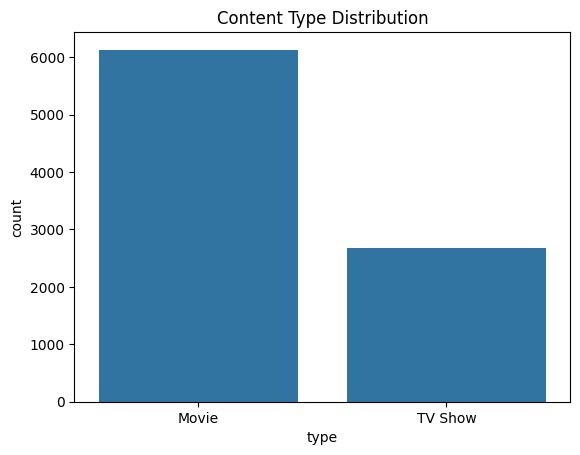

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=df)
plt.title('Content Type Distribution')
plt.show()


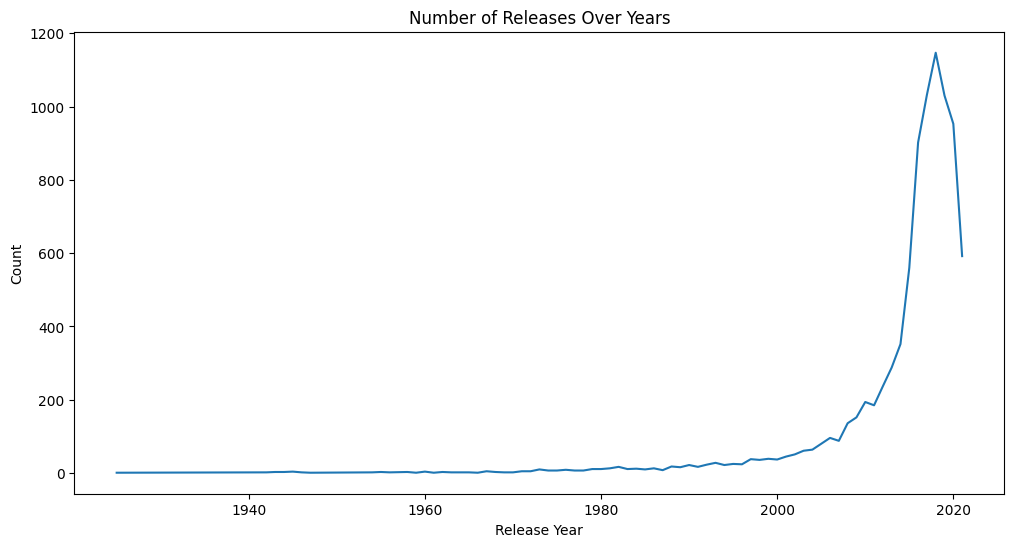

In [7]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title('Number of Releases Over Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


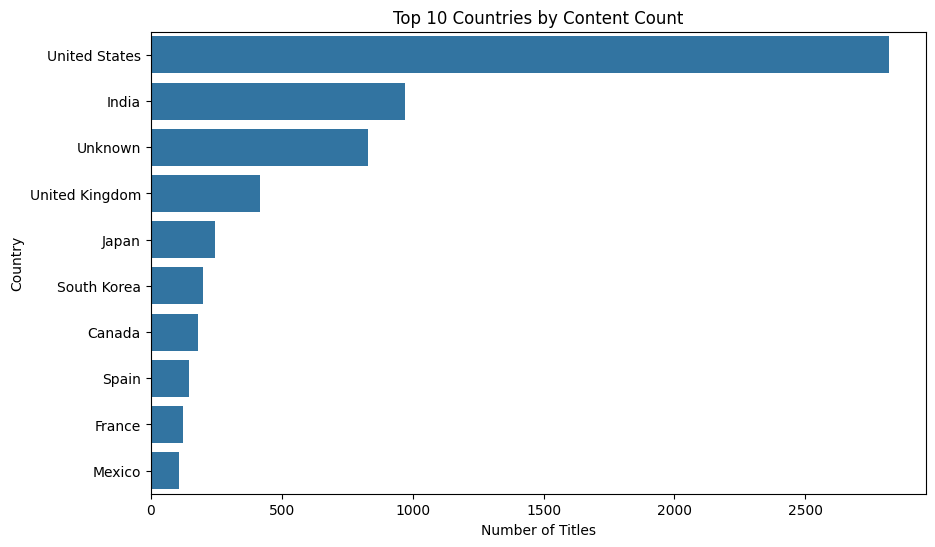

In [8]:
# Fill missing country values before proceeding if not done already
df['country'].fillna('Unknown', inplace=True)

# Plot the top 10 countries by content count
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


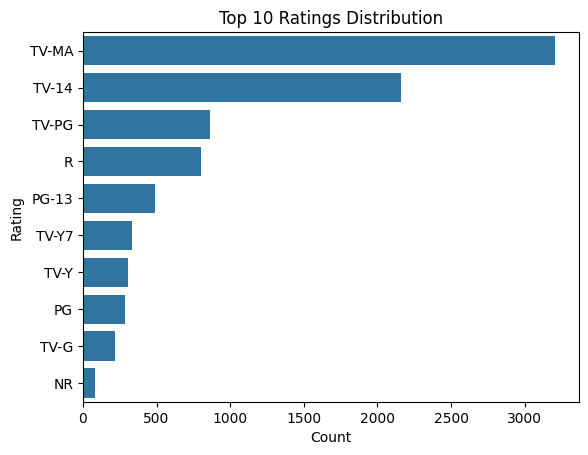

In [9]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index[:10])
plt.title('Top 10 Ratings Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()
